In [27]:
import jieba
import jieba.analyse
import pandas as pd

### 分詞

In [28]:
string2=['']
with open("hw1-dataset.txt", "r",encoding = 'utf-8') as f:
    data = f.read().splitlines()
    string2=data
stri = "".join(string2)
string1 = jieba.lcut(stri,cut_all=False)

### 移除停留詞

In [29]:
new_list = []
def remove_stop_words(file_name,string1):
    with open(file_name,'r',encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
  
    for seg in string1:
        if seg not in stop_words:
            if seg == '\n':
                continue
            elif seg == '\t':
                continue
            elif seg == ' ':
                continue
            elif len(seg) == 1:
                continue
            else:
                new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = './停留詞.txt'
string1 = remove_stop_words(file_name,string1)
#print('remove_stop_words: ',string1)

### TF-IDF權重

In [30]:
tagWordArr = []
weightArr =[]

tags = jieba.analyse.extract_tags(stri, topK=100, withWeight=True)
for tag in tags:
    tagWordArr.append(tag[0])
    weightArr.append(tag[1])
    
#print(tagWordArr)
#print(weightArr)

### TF-IDF長條圖 

1 : 什麼
2 : 八卦
3 : 台灣
4 : 怎麼
5 : 肥宅
6 : 沒有
7 : 不會
8 : 一個
9 : 還是
10 : 是不是
11 : 中國
12 : 這樣
13 : 現在
14 : 時候
15 : 怎樣
16 : 一樣
17 : 真的
18 : ...
19 : 應該
20 : 可以
21 : 喜歡
22 : 因為
23 : 一堆
24 : 問題
25 : 感覺
26 : 哪個
27 : 女生
28 : 這麼
29 : 覺得
30 : 這種
31 : 美國
32 : 正妹
33 : 知道
34 : 其實
35 : 比較
36 : 還有
37 : 那麼
38 : 東西
39 : 到底
40 : 有人
41 : 自己
42 : 時間
43 : 開始
44 : QQ
45 : 這個
46 : 哪裡
47 : 不是
48 : 沒人
49 : 甚麼
50 : 出來
51 : 日本
52 : 那個
53 : 為何
54 : 如果
55 : 發現
56 : 國家
57 : 中國人
58 : 不要
59 : 就是
60 : 他們
61 : 大家
62 : 朋友
63 : 很多
64 : 台北
65 : 已經
66 : 老師
67 : 變成
68 : 大學
69 : 結果
70 : 我們
71 : 邊緣
72 : 不用
73 : 遊戲
74 : 多少
75 : 看到
76 : 一點
77 : 男生
78 : 別人
79 : 當然
80 : 手機
81 : 10
82 : 女友
83 : 如何
84 : 還要
85 : 還好
86 : 電影
87 : 韓國
88 : 新聞
89 : 起來
90 : 根本
91 : 鄉民
92 : 好吃
93 : 妹妹
94 : 的掛
95 : XD
96 : 不過
97 : 一直
98 : ..
99 : ptt
100 : 最強


<BarContainer object of 100 artists>

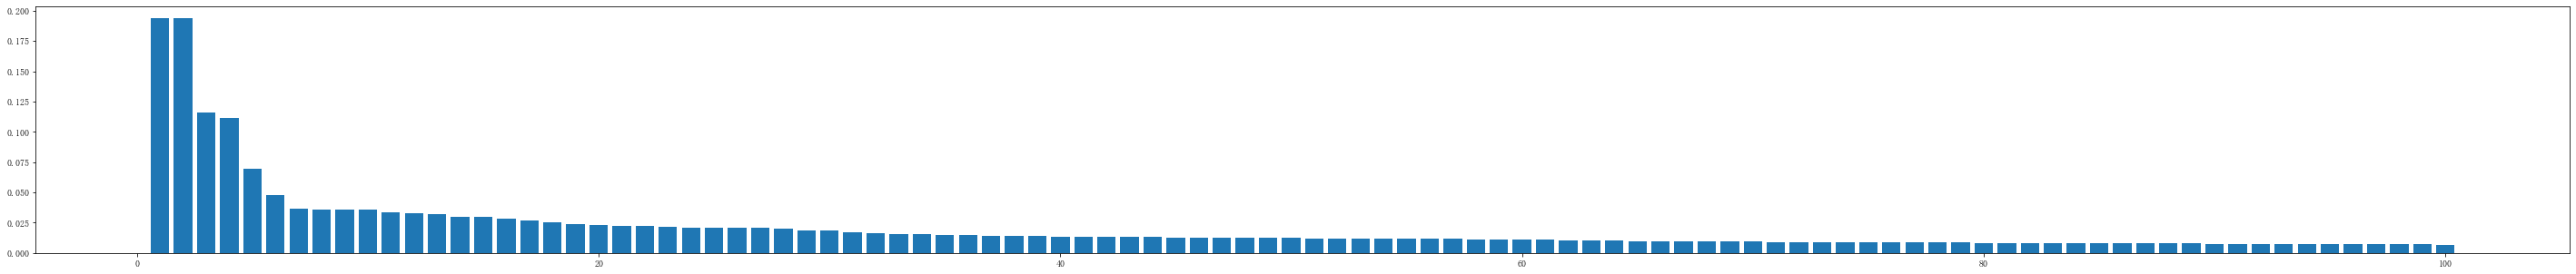

In [31]:
import matplotlib.pyplot as plt
import matplotlib

num = []
index=1
for i in range(100):
    num.append(index)
    print(index,":",tagWordArr[i])
    index+=1

matplotlib.rc("font",family='SimSun')
plt.figure(figsize=(50,5))
plt.bar(num, weightArr)

### 詞頻統計

In [32]:
new={}
wordArr = []
countArr =[]
for word in string1:
    # 對原來的字典new中判斷是否有rword這個人，沒有就返回0，
    # 賦予rword鍵有就在原來rword所對應的值加1，並賦予rword鍵
    new[word]=new.get(word,0)+1
    
item=list(new.items())
item.sort(key=lambda x:x[1],reverse=True)
for i in range(100):
    word,count=item[i]
    wordArr.append(word)
    countArr.append(count)

### 頻率長條圖 

1 : 八卦
2 : 什麼
3 : 台灣
4 : 怎麼
5 : 可以
6 : 是不是
7 : 肥宅
8 : 真的
9 : 沒有
10 : 知道
11 : 自己
12 : 不是
13 : 就是
14 : 不會
15 : 如果
16 : 一個
17 : 還是
18 : 一堆
19 : 中國
20 : 這樣
21 : 有人
22 : 現在
23 : 時候
24 : 怎樣
25 : 女生
26 : 日本
27 : 一樣
28 : 到底
29 : 不要
30 : 大家
31 : 很多
32 : 應該
33 : 喜歡
34 : 因為
35 : 看到
36 : 朋友
37 : 問題
38 : 感覺
39 : 哪個
40 : 如何
41 : 這麼
42 : 多少
43 : 一直
44 : 覺得
45 : 這種
46 : 不能
47 : 不用
48 : 美國
49 : 根本
50 : 一定
51 : 正妹
52 : 其實
53 : 只有
54 : 比較
55 : 還有
56 : 台北
57 : 那麼
58 : 可能
59 : 以前
60 : 東西
61 : 時間
62 : 一下
63 : 開始
64 : QQ
65 : 這個
66 : 妹妹
67 : 哪裡
68 : 世界
69 : 今天
70 : 沒人
71 : 甚麼
72 : 出來
73 : 所以
74 : 那個
75 : 直接
76 : 為何
77 : 發現
78 : 不到
79 : 工作
80 : 國家
81 : 中國人
82 : 只是
83 : 好吃
84 : 男生
85 : 他們
86 : 公司
87 : 老婆
88 : 女友
89 : 已經
90 : 老師
91 : 變成
92 : 人家
93 : 一起
94 : 大學
95 : 結果
96 : 我們
97 : 南部
98 : 需要
99 : 好像
100 : 邊緣


<BarContainer object of 100 artists>

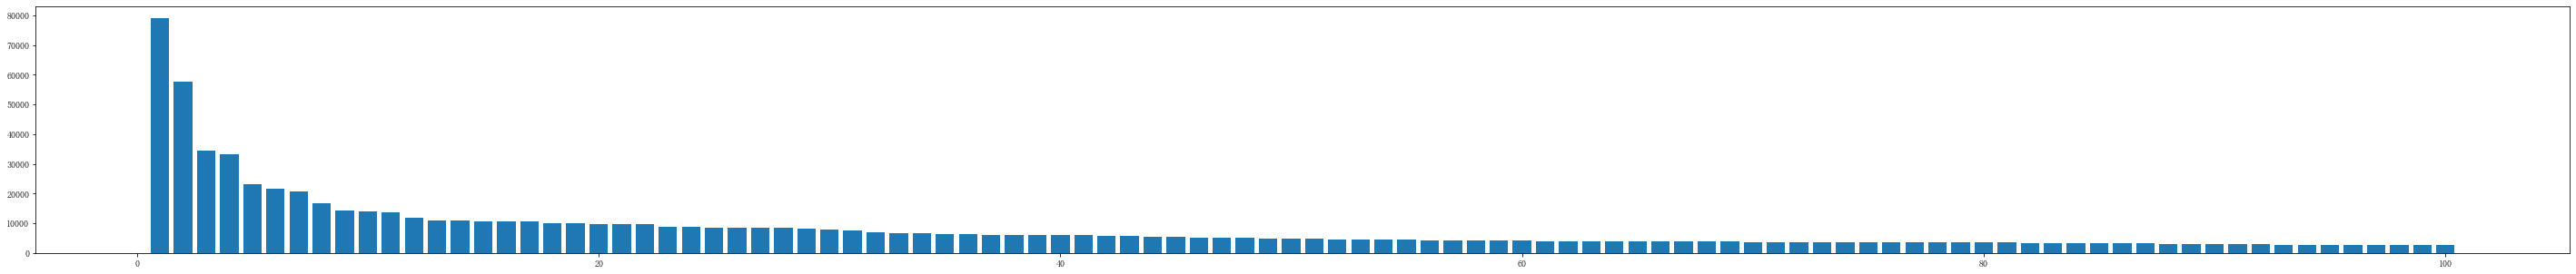

In [33]:
num = []
index=1
for i in range(100):
    num.append(index)
    print(index,":",wordArr[i])
    index+=1

matplotlib.rc("font",family='SimSun')
plt.figure(figsize=(50,5))
plt.bar(num, countArr)